In [33]:
# Step 1: Load the Data
import pandas as pd

# Load the dataset
company_data = pd.read_csv('/content/Company_Data (1).csv')

In [34]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [35]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [36]:
# Check for missing values
print("\nMissing Values:")
print(company_data.isnull().sum())


Missing Values:
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


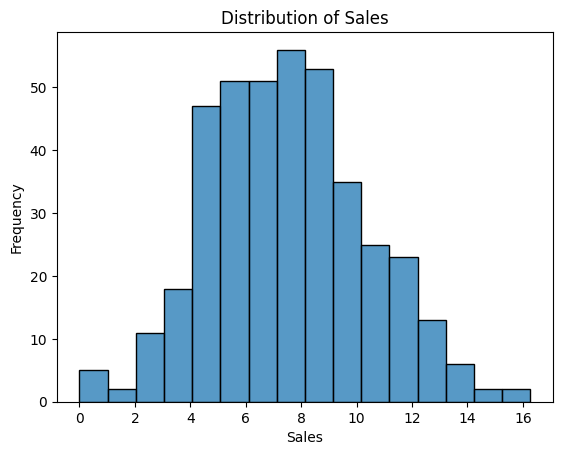

In [38]:
# Step 2: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis
sns.histplot(company_data['Sales'])
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

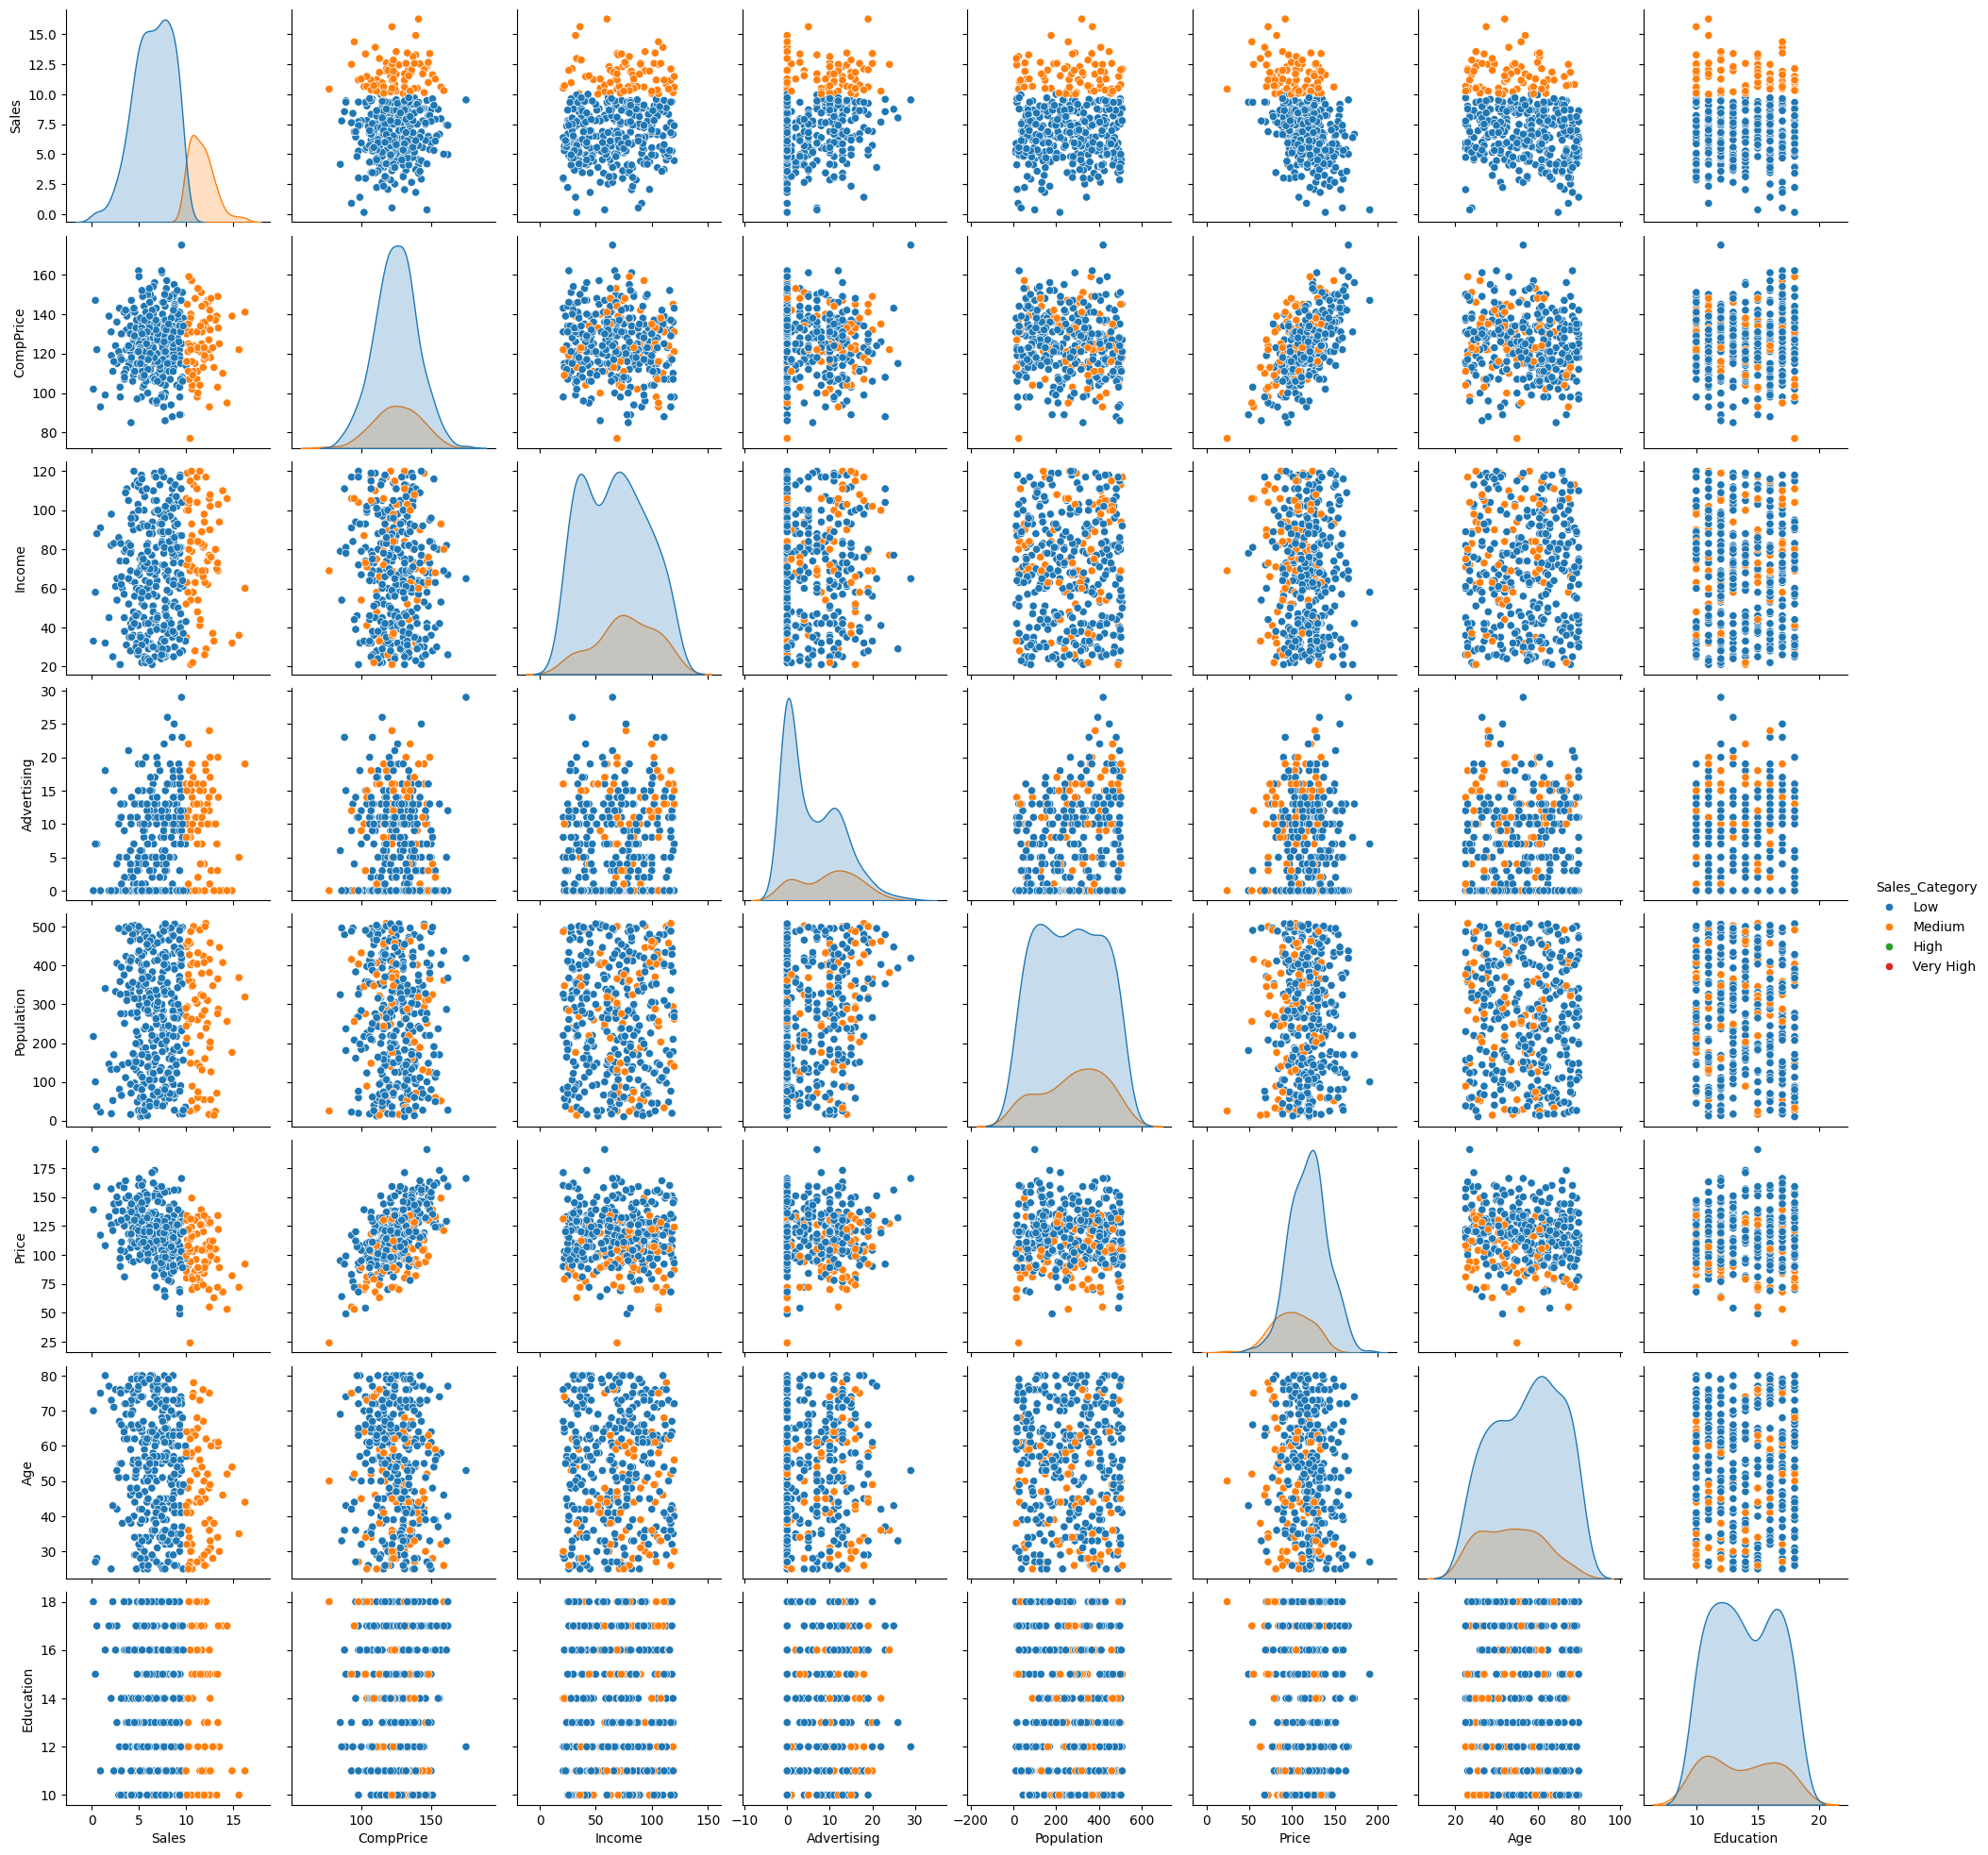

In [39]:
# Bivariate Analysis
sns.pairplot(company_data, hue='Sales_Category')
plt.show()


In [63]:
# Step 2: Data Preprocessing
# Encode categorical variables
company_data_encoded = pd.get_dummies(company_data, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)


In [64]:
# Convert 'Sales_Category' into numerical labels
label_encoder = LabelEncoder()
company_data_encoded['Sales_Category'] = label_encoder.fit_transform(company_data_encoded['Sales_Category'])


In [65]:
# Step 4: Split the Data
X = company_data_encoded.drop(['Sales', 'Sales_Category'], axis=1)
y = company_data_encoded['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:

# Step 5: Train the Random Forest Model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [67]:
# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Step 6: Model Evaluation
from sklearn.metrics import classification_report, accuracy_score

# Predict sales categories on the testing data
y_pred = rf_model.predict(X_test)

In [71]:

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        61
           1       0.73      0.42      0.53        19

    accuracy                           0.82        80
   macro avg       0.78      0.69      0.71        80
weighted avg       0.81      0.82      0.81        80



In [72]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.825


In [73]:

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        61
           1       0.73      0.42      0.53        19

    accuracy                           0.82        80
   macro avg       0.78      0.69      0.71        80
weighted avg       0.81      0.82      0.81        80



In [74]:
# Step 7: Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
CompPrice           0.098181
Income              0.102419
Advertising         0.114199
Population          0.102102
Price               0.219230
Age                 0.113153
Education           0.058807
ShelveLoc_Good      0.141840
ShelveLoc_Medium    0.016783
Urban_Yes           0.012549
US_Yes              0.020737
dtype: float64


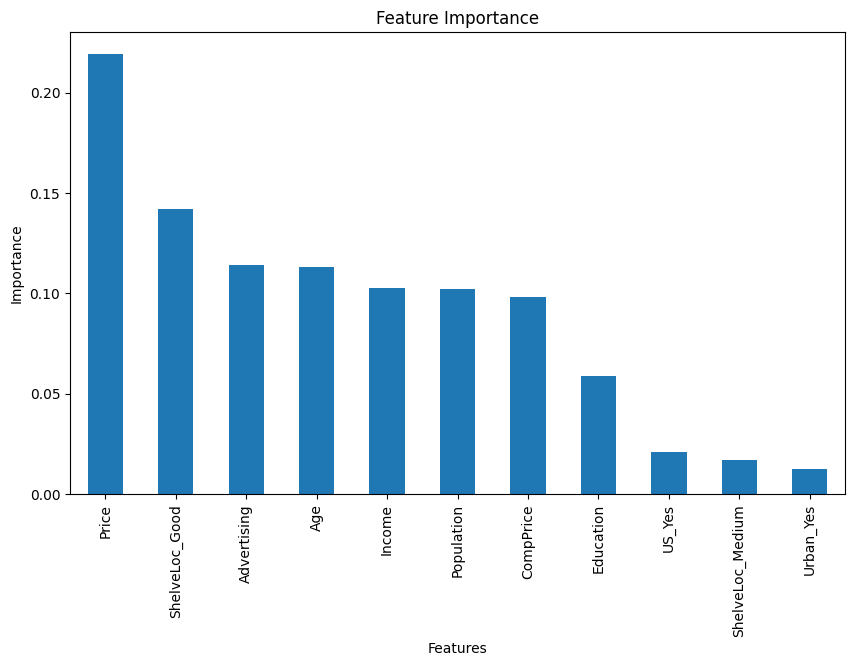

In [75]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
